In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [3]:
dataFrame = pd.read_excel("merc.xlsx")
dataFrame.head()  # ilk 5 satırı gösterir

,year,price,transmission,mileage,tax,mpg,engineSize
0,2005,5200,Automatic,63000,325,32.1,1.8
1,2017,34948,Automatic,27000,20,61.4,2.1
2,2016,49948,Automatic,6200,555,28.0,5.5
3,2016,61948,Automatic,16000,325,30.4,4.0
4,2016,73948,Automatic,4000,325,30.1,4.0


In [4]:
dataFrame.shape  # veri çerçevesinin boyutlarını gösterir
dataFrame.info()  # veri çerçevesinin bilgilerini gösterir

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13119 entries, 0 to 13118
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          13119 non-null  int64  
 1   price         13119 non-null  int64  
 2   transmission  13119 non-null  object 
 3   mileage       13119 non-null  int64  
 4   tax           13119 non-null  int64  
 5   mpg           13119 non-null  float64
 6   engineSize    13119 non-null  float64
dtypes: float64(2), int64(4), object(1)
memory usage: 717.6+ KB


In [5]:
dataFrame.describe()  # istatistiksel özet

,year,price,mileage,tax,mpg,engineSize
count,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000
mean,2017.296288,24698.596920,21949.559037,129.972178,55.155843,2.071530
std,2.224709,11842.675542,21176.512267,65.260286,15.220082,0.572426
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17450.000000,6097.500000,125.000000,45.600000,1.800000
50%,2018.000000,22480.000000,15189.000000,145.000000,56.500000,2.000000
75%,2019.000000,28980.000000,31779.500000,145.000000,64.200000,2.100000
max,2020.000000,159999.000000,259000.000000,580.000000,217.300000,6.200000


### NaN veri var mi onu kontrol etmeliyiz

In [6]:
dataFrame.isnull().sum()  # NaN değerlerin sayısını gösterir

year            0
price           0
transmission    0
mileage         0
tax             0
mpg             0
engineSize      0
dtype: int64

C:\Users\ysfygc\AppData\Local\Temp\ipykernel_16688\3605570669.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataFrame["price"])


<Axes: xlabel='price', ylabel='Density'>

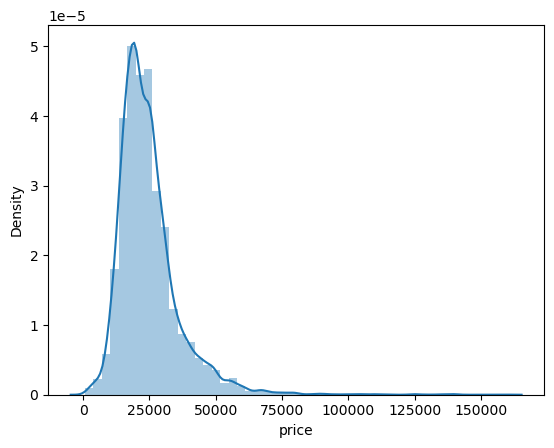

In [ ]:
sns.distplot(dataFrame["price"])
# cok pahali olan ama az miktarda olan arabalar verinin kalitesini ve dagilim oranini bozabililr bu yuzden bu araclari cikarabiliriz

<Axes: ylabel='count'>

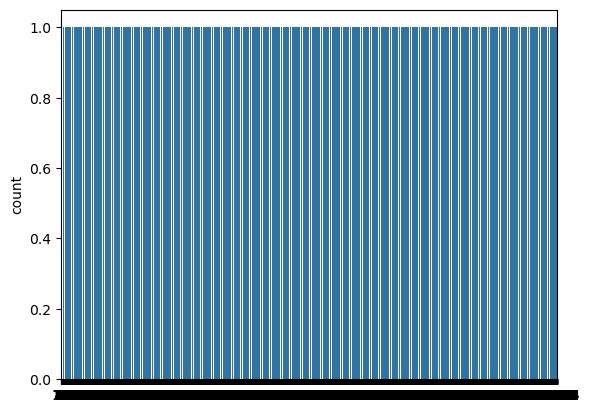

In [10]:
sns.countplot(dataFrame["year"])

In [ ]:
print(dataFrame["year"].value_counts())

year
2019    4553
2017    2381
2016    1971
2018    1467
2015     991
2020     719
2014     491
2013     292
2012      57
2011      38
2010      38
2007      22
2009      17
2008      16
2004      13
2001      10
2002       9
2005       9
2006       8
2003       7
1998       4
2000       3
1997       1
1999       1
1970       1
Name: count, dtype: int64


In [ ]:
dataFrame.select_dtypes(include=["number"]).corr() # korelasyon matrisini gösterir 
# Bu yöntem object, string, category gibi sayısal olmayan tüm sütunları otomatik olarak hariç tutar. String ifadeler floata cevrilmedigi icin sikinti olusturdu

,year,price,mileage,tax,mpg,engineSize
year,1.000000,0.520712,-0.738027,0.012480,-0.094626,-0.142147
price,0.520712,1.000000,-0.537214,0.268717,-0.438445,0.516126
mileage,-0.738027,-0.537214,1.000000,-0.160223,0.202850,0.063652
tax,0.012480,0.268717,-0.160223,1.000000,-0.513742,0.338341
mpg,-0.094626,-0.438445,0.202850,-0.513742,1.000000,-0.339862
engineSize,-0.142147,0.516126,0.063652,0.338341,-0.339862,1.000000


In [ ]:
dataFrame.select_dtypes(include=["number"]).corr()["price"].sort_values(ascending=False)  # fiyat ile diğer sütunlar arasındaki korelasyonu gösterir
# bu incelemeden sonra fiyat ile en çok ilişkili olan sütunların "year", "mileage" ve "engineSize" olduğunu görebiliriz.
# eksiler negatif etkileşim, artılar ise pozitif etkileşim olduğunu gösterir.

price         1.000000
year          0.520712
engineSize    0.516126
tax           0.268717
mpg          -0.438445
mileage      -0.537214
Name: price, dtype: float64

## km ve fiyata gore dagilim

<Axes: xlabel='mileage', ylabel='price'>

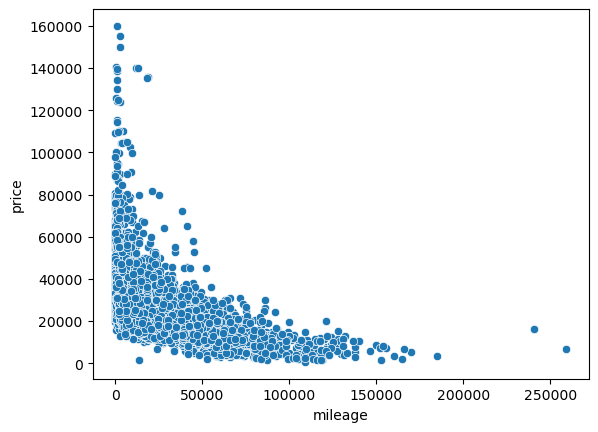

In [19]:
sns.scatterplot(x="mileage", y="price", data=dataFrame)

In [20]:
# En yuksek fiyatli arabalari inceliyoruz
dataFrame.sort_values("price", ascending=False).head(20)  # en yüksek fiyatlı 10 aracı gösterir

,year,price,transmission,mileage,tax,mpg,engineSize
6199,2020,159999,Semi-Auto,1350,145,21.4,4.0
10044,2020,154998,Automatic,3000,150,21.4,4.0
5,2011,149948,Automatic,3000,570,21.4,6.2
8737,2019,140319,Semi-Auto,785,150,22.1,4.0
6386,2018,139995,Semi-Auto,13046,145,21.4,4.0
8,2019,139948,Automatic,12000,145,21.4,4.0
9133,2019,139559,Semi-Auto,1000,145,22.1,4.0
8821,2020,138439,Semi-Auto,1000,145,22.1,4.0
5902,2018,135771,Semi-Auto,19000,145,21.4,4.0
7864,2018,135124,Semi-Auto,18234,150,21.4,4.0


In [ ]:
# bir verinini %99 unu alsam tahmin degeri cok degimez ama ben o %1 lik kisimda ki veri setini olumsuz etkileyen bir cok veriden kurtulabilirim
len(dataFrame) * 0.01  # veri setinin %1'ini hesaplar---> en pahali 131 arabayi cikarabiliriz

131.19

In [23]:
temizlenmisDataDf = dataFrame.sort_values("price", ascending=False).iloc[131:]  # en pahalı 131 aracı hariç tutar yukardan asagi 131. satırdan başlar

In [24]:
temizlenmisDataDf.describe()  # temizlenmiş veri çerçevesinin istatistiksel özetini gösterir

,year,price,mileage,tax,mpg,engineSize
count,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000
mean,2017.281876,24074.926933,22132.741146,129.689714,55.437142,2.050901
std,2.228515,9866.224575,21196.776401,65.183076,15.025999,0.532596
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17357.500000,6322.000000,125.000000,45.600000,1.675000
50%,2018.000000,22299.000000,15369.500000,145.000000,56.500000,2.000000
75%,2019.000000,28706.000000,31982.250000,145.000000,64.200000,2.100000
max,2020.000000,65990.000000,259000.000000,580.000000,217.300000,6.200000


C:\Users\ysfygc\AppData\Local\Temp\ipykernel_16688\563828905.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(temizlenmisDataDf["price"])


<Axes: xlabel='price', ylabel='Density'>

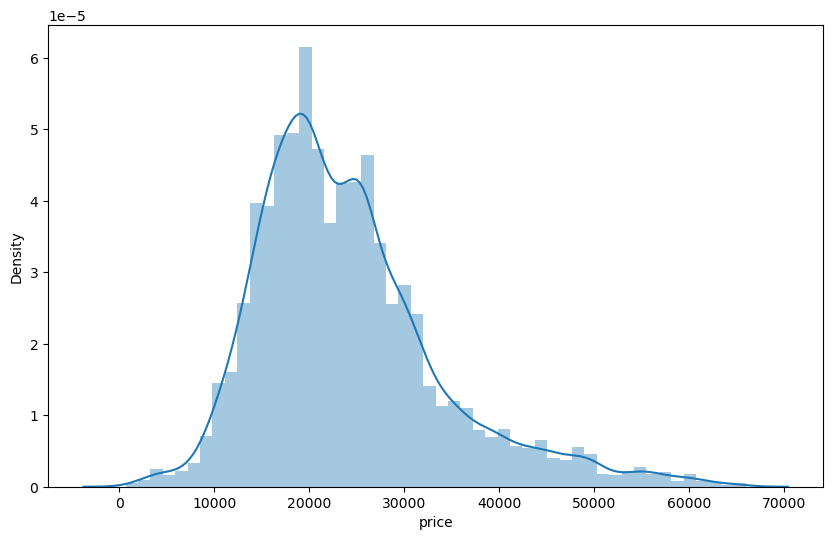

In [25]:
plt.figure(figsize=(10, 6))
sns.distplot(temizlenmisDataDf["price"])

year
1970    24999.000000
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011    12624.894737
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16731.780020
2016    19307.892948
2017    21514.307854
2018    25720.162918
2019    31290.020865
2020    35433.282337
Name: price, dtype: float64

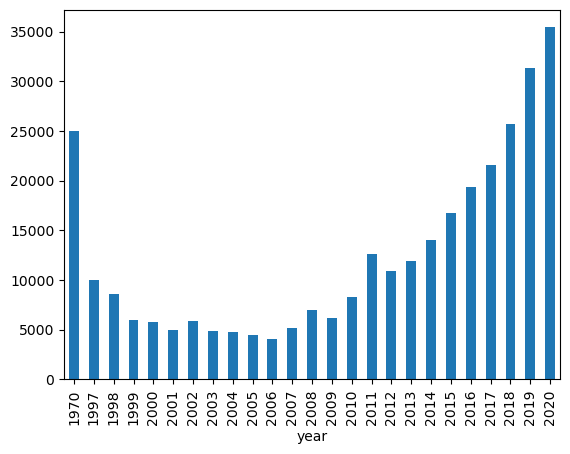

In [27]:
dataFrame.groupby("year")["price"].mean().plot(kind="bar")  # yıl bazında ortalama fiyatları gösterir
dataFrame.groupby("year")["price"].mean()

In [28]:
dataFrame = temizlenmisDataDf  # temizlenmiş veri çerçevesini ana veri çerçevesi olarak atar

In [30]:
dataFrame = dataFrame[dataFrame.year != 1970]  # 1970 model araçları hariç tutar BUDA BIR TEMIZLIK

In [32]:
dataFrame.groupby("year")["price"].mean()#.sort_values(ascending=False)  # yıl bazında ortalama fiyatları gösterir ve azalan sırada sıralar

year
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011     8913.459459
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16647.822222
2016    19223.558943
2017    21356.280421
2018    24800.844506
2019    30289.524832
2020    34234.794872
Name: price, dtype: float64

In [33]:
dataFrame = dataFrame.drop("transmission", axis=1)  # "transmission" sütununu veri çerçevesinden kaldırır buda bir temizliktir cunku sayısal olmayan bir veri

In [34]:
dataFrame.head()  # temizlenmiş veri çerçevesinin ilk 5 satırını gösterir

,year,price,mileage,tax,mpg,engineSize
6177,2019,65990,5076,150,30.4,3.0
5779,2020,65990,999,145,28.0,4.0
3191,2020,65980,3999,145,28.0,4.0
4727,2019,65000,3398,145,27.2,4.0
8814,2019,64999,119,145,40.9,3.0


### Veriyi temizledikten sonra modeli olusturmaya basliyoruz

In [35]:
y = dataFrame["price"].values  # hedef değişkeni (fiyat) ayırır
X = dataFrame.drop("price", axis=1).values  # özellikleri (fiyat hariç) ayırır

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)  # veriyi eğitim ve test setlerine böler

In [37]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [38]:
X_train = scaler.fit_transform(X_train)  # eğitim verilerini ölçeklendirir
X_test = scaler.transform(X_test)  # test verilerini ölçeklendirir

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [ ]:
X_train.shape # eğitim verilerinin boyutunu gösterir 5 ozellik var

(9090, 5)

## model olusturuyoruz

In [54]:
model = Sequential()  # model nesnesini oluşturur

model.add(Dense(12, activation="relu"))  # ilk katmanı ekler
model.add(Dense(12, activation="relu"))  # ilk katmanı ekler
model.add(Dense(12, activation="relu"))  # ilk katmanı ekler
model.add(Dense(12, activation="relu"))  # ilk katmanı ekler
model.add(Dense(12, activation="relu"))  # ilk katmanı ekler

model.add(Dense(1))  # çıkış katmanını ekler (fiyat tahmini için tek bir çıktı)

model.compile(optimizer="adam", loss="mse")  # modeli derler, "adam" optimizasyon algoritmasını ve "mse" kayıp fonksiyonunu kullanır

In [55]:
model.fit(x=X_train,y= y_train,validation_data=(X_test,y_test), epochs=300, batch_size=250)  # modeli eğitir

Epoch 1/300
37/37 [==============================] - 1s 7ms/step - loss: 672134016.0000 - val_loss: 688076544.0000
Epoch 2/300
37/37 [==============================] - 0s 2ms/step - loss: 672059264.0000 - val_loss: 687930048.0000
Epoch 3/300
37/37 [==============================] - 0s 2ms/step - loss: 671751424.0000 - val_loss: 687335168.0000
Epoch 4/300
37/37 [==============================] - 0s 2ms/step - loss: 670579776.0000 - val_loss: 685203968.0000
Epoch 5/300
37/37 [==============================] - 0s 2ms/step - loss: 666724288.0000 - val_loss: 678506432.0000
Epoch 6/300
37/37 [==============================] - 0s 2ms/step - loss: 655496064.0000 - val_loss: 660292736.0000
Epoch 7/300
37/37 [==============================] - 0s 2ms/step - loss: 627000512.0000 - val_loss: 616279744.0000
Epoch 8/300
37/37 [==============================] - 0s 2ms/step - loss: 563655616.0000 - val_loss: 526478208.0000
Epoch 9/300
37/37 [==============================] - 0s 2ms/step - loss: 4479110

<Axes: >

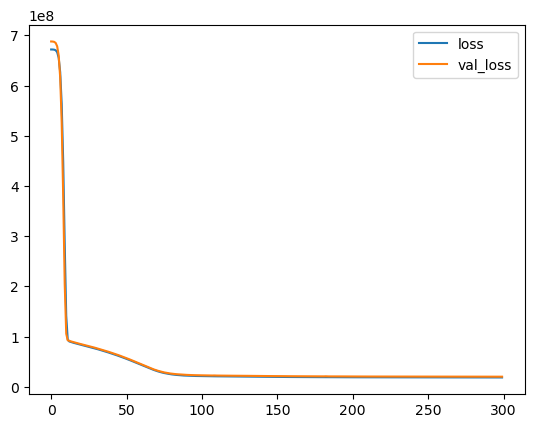

In [56]:
lossData = pd.DataFrame(model.history.history)  # modelin eğitim geçmişini DataFrame'e dönüştürür
lossData.plot()  # eğitim kaybını ve doğrulama kaybını gösterir

In [57]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
tahminDizisi= model.predict(X_test)  # test verileri üzerinde tahmin yapar

122/122 [==============================] - 0s 944us/step


In [58]:
tahminDizisi

array([[21576.967],
       [22394.217],
       [26008.621],
       ...,
       [27037.012],
       [14063.472],
       [25265.303]], dtype=float32)

In [59]:
mean_absolute_error(y_test, tahminDizisi)  # ortalama mutlak hatayı hesaplar
# aradaki fark 3204 poundmus

3198.589599609375

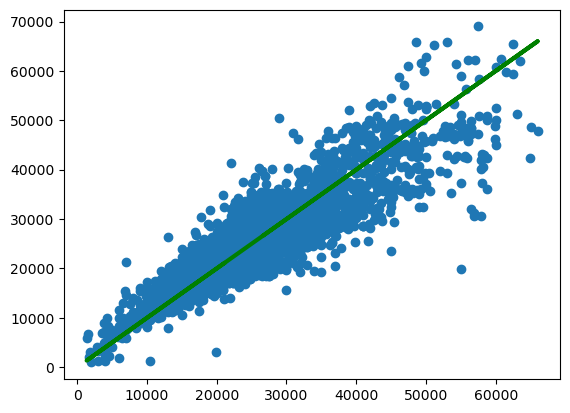

In [62]:
plt.scatter(y_test, tahminDizisi)  # gerçek değerler ile tahmin edilen değerleri karşılaştırır
plt.plot(y_test,y_test,linewidth=3,color='green')  # gerçek değerler

### EarlyStoping

earlyStopping = EarlyStopping(monitor='val_losss', mode='min', verbose=1 ,patience= 25)

model.fit(x=X_train,y= y_train,validation_data=(X_test,y_test), epochs=700, verbose=1 ,callbacks=[earlyStopping])

### Dropout ve bazi sklearn ifadeleri

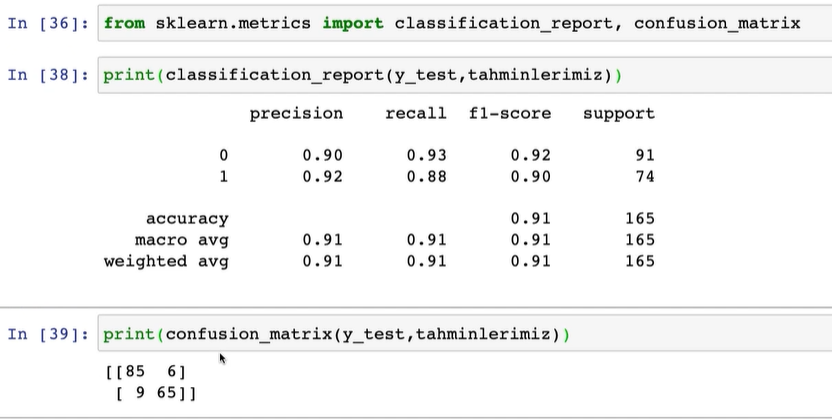